<a href="https://colab.research.google.com/github/MohHaroon/Adult-Census-Income-Classification/blob/main/Adult%20dataset%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load libraries


In [72]:
# importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load the dataset

In [73]:
!pip install ucimlrepo

In [74]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
x = adult.data.features
y = adult.data.targets


# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [75]:
# Combining the dataframes for the ease of data pre-processing
adult_df = pd.concat([x, y],axis=1)
adult_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [76]:
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [77]:
adult_df.shape

(48842, 15)

In [78]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [79]:
adult_df['income'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [80]:
adult_df['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [81]:
adult_df['age'].value_counts()

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

In [82]:
adult_df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [83]:
adult_df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [84]:
adult_df['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [85]:
adult_df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [86]:
adult_df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [87]:
adult_df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

#Preprocessing of the dataset


# Remove the decimal point from the income column

In [88]:
# Replacing row values in the income column
adult_df['income'].replace('<=50K.', '<=50K', inplace=True)
adult_df['income'].replace('>50K.', '>50K', inplace=True)

In [89]:
# Checking if errorneous data still exists
adult_df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

#Handle duplicates

In [90]:
# Display the number of duplicate rows and drop them.
num_of_duplicates = adult_df.duplicated().sum()
print("The total number of duplicates found in this dataset is : ", num_of_duplicates)
adult_df = adult_df.drop_duplicates()

The total number of duplicates found in this dataset is :  48


#Handle outliers

In [91]:
def detect_outliers_iqr(dataframe, column):

    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)

    # Interquartile Range (IQR)
    IQR = Q3 - Q1

    lowerbound = Q1 - 1.5 * IQR
    upperbound = Q3 + 1.5 * IQR

    # Determine outliers
    outliers = dataframe[(dataframe[column] < lowerbound) | (dataframe[column] > upperbound)]

    return outliers

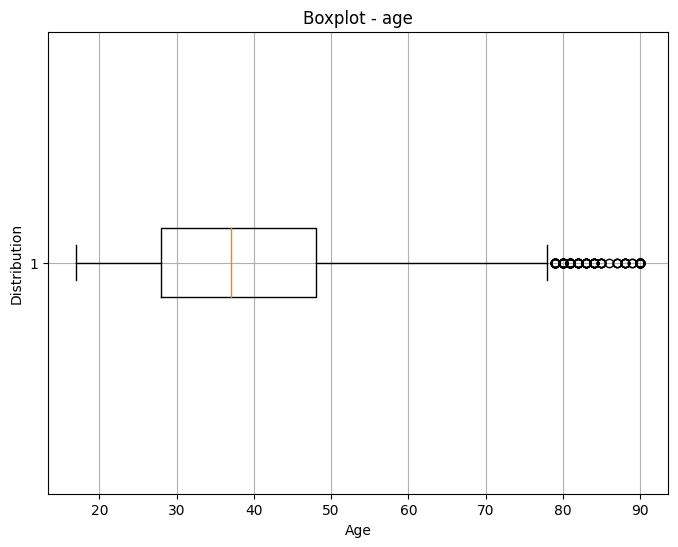

In [92]:
plt.figure(figsize=(8, 6))
plt.boxplot(adult_df['age'], vert=False)
plt.title('Boxplot - age')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

In [93]:
# Detect outliers in the age column
outliers_age = detect_outliers_iqr(adult_df, 'age')
outliers_age.shape
adult_df.shape

(48794, 15)

In [94]:
# Drop outliers from the age column
adult_df = adult_df.drop(outliers_age.index)
adult_df.shape

(48579, 15)

#Replace "?" with NaN

In [95]:
adult_df.replace('?', np.NaN,inplace = True)
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [96]:
# Using backfill to fill the null rows in the columns
adult_df.fillna(method = 'bfill', inplace = True)

In [97]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [98]:
adult_df['occupation'].value_counts()

Prof-specialty       6532
Craft-repair         6449
Exec-managerial      6389
Adm-clerical         5937
Sales                5809
Other-service        5186
Machine-op-inspct    3190
Transport-moving     2490
Handlers-cleaners    2198
Farming-fishing      1574
Tech-support         1524
Protective-serv      1037
Priv-house-serv       249
Armed-Forces           15
Name: occupation, dtype: int64

In [99]:
adult_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48579.000000,4.857900e+04,48579.000000,48579.000000,48579.000000,48579.000000
mean,38.452418,1.898174e+05,10.082711,1077.576031,87.421684,40.481628
std,13.404839,1.056710e+05,2.563973,7453.940857,402.237923,12.339690
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783190e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377310e+05,12.000000,0.000000,0.000000,45.000000
max,78.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#Data Analysis

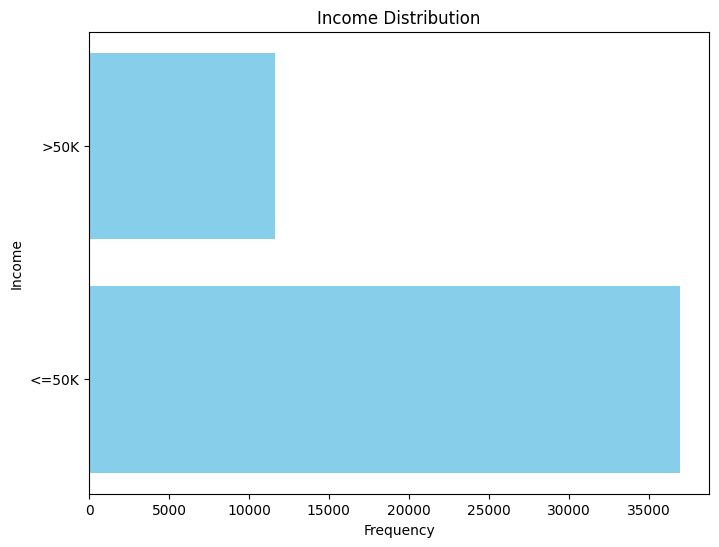

In [100]:
#Check for data imbalance
plt.figure(figsize=(8, 6))
plt.barh(adult_df['income'].value_counts().index, adult_df['income'].value_counts(), color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Income')
plt.title('Income Distribution')
plt.show()

KeyboardInterrupt: 

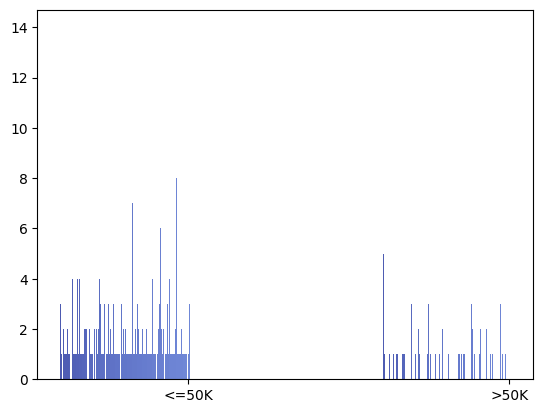

In [101]:
# Plot depicting the income for each worklass and the count
sns.countplot(x='income', palette='coolwarm', hue='fnlwgt', data=adult_df);

In [ ]:
# Plot depicting the income for each worklass and the count
sns.countplot(x='income', palette='coolwarm', hue='education-num', data=adult_df);

In [ ]:
# Plot depicting the income for each worklass and the count
sns.countplot(x='income', palette='coolwarm', hue='capital-loss', data=adult_df);

In [ ]:
# Plot depicting the income for each worklass and the count
sns.countplot(x='income', palette='coolwarm', hue='workclass', data=adult_df);

In [ ]:
# Plot depicting the income for each sex and the count
sns.countplot(x='income', palette='coolwarm', hue='sex', data=adult_df);

In [ ]:
# Plot depicting the income for each hours per week and the count
sns.countplot(x='income', palette='coolwarm', hue='hours-per-week', data=adult_df);

In [ ]:
# Plot depicting the income for capital gain and the count
sns.countplot(x='income', palette='coolwarm', hue='capital-gain', data=adult_df);

In [ ]:
# Plot depicting the income for each marital status and the count
sns.countplot(x='income', palette='coolwarm', hue='marital-status', data=adult_df);

In [ ]:
# Plot depicting the income for each age and the count
sns.countplot(x='income', palette='coolwarm', hue='age', data=adult_df);

In [ ]:
# Plot depicting the income for each race and their proportion of population
race = round(pd.crosstab(adult_df.race, adult_df.income).div(pd.crosstab(adult_df.race, adult_df.income).apply(sum,1),0),2)
race.sort_values(by = '>50K', inplace = True)
ax = race.plot(kind ='bar', title = 'Proportion distribution across race levels', figsize = (10,8))
ax.set_xlabel('Race level')
ax.set_ylabel('Proportion of population')

print()

In [ ]:
# Plot depicting the income for each occupation and their proportion of population
occupation = round(pd.crosstab(adult_df.occupation, adult_df.income).div(pd.crosstab(adult_df.occupation, adult_df.income).apply(sum,1),0),2)
occupation.sort_values(by = '>50K', inplace = True)
ax = occupation.plot(kind ='bar', title = 'Proportion distribution across occupation', figsize = (10,8))
ax.set_xlabel('Occupation')
ax.set_ylabel('Proportion of population')

print()

In [ ]:
# Plot depicting the income for each education level and their proportion of population
education = round(pd.crosstab(adult_df.education, adult_df.income).div(pd.crosstab(adult_df.education, adult_df.income).apply(sum,1),0),2)
education.sort_values(by = '>50K', inplace = True)
ax = education.plot(kind ='bar', title = 'Proportion distribution across education', figsize = (10,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')

print()

In [ ]:
# Plot depicting the income for each education and their proportion of population
native_country = round(pd.crosstab(adult_df.native-country, adult_df.income).div(pd.crosstab(adult_df.native-country, adult_df.income).apply(sum,1),0),2)
native_country.sort_values(by = '>50K', inplace = True)
ax = native_country.plot(kind ='bar', title = 'Proportion distribution across native-country', figsize = (10,8))
ax.set_xlabel('native-country')
ax.set_ylabel('Proportion of population')

print()

#Feature engineering

In [ ]:
#For the marital-status column
adult_df['marital-status'] = adult_df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent', 'Separated'], 'Married')
adult_df['marital-status'] = adult_df['marital-status'].replace(['Never-married', 'Divorced', 'Widowed'], 'Not Married')

In [ ]:
#For the relationship column
adult_df['relationship'] = adult_df['relationship'].replace(['Husband', 'Wife'], 'Married')
adult_df['relationship'] = adult_df['relationship'].replace(['Not-in-family', 'Own-child', 'Unmarried', 'Other-relative'], 'Other relationship')

In [ ]:
adult_df["marital-status"].value_counts()

In [ ]:
#For income column
adult_df["income"] = adult_df["income"].replace(['<=50K'], 0)
adult_df["income"] = adult_df["income"].replace(['>50K'], 1)

In [ ]:
adult_df["income"].value_counts()

#Correlation

In [ ]:
# Converting categorical columns to numeric using LabelEncoder t
# To get columns correlation
from sklearn.preprocessing import LabelEncoder

df_corr= adult_df.copy()
df_corr= df_corr.apply(LabelEncoder().fit_transform)

In [ ]:
# Getting the correlation, to identify what columns can be dropped before model training
df_corr.corr()

In [ ]:
sns.heatmap(df_corr.corr());

#Drop columns (workclass, fnlwgt, education, race, native-country, occupation)

In [ ]:
# Dropping columns that have a correlation close to 0
adult_df = adult_df.drop(['workclass', 'fnlwgt','education','race','native-country','occupation'], axis = 1)
adult_df.head(3)

#Histograms

In [ ]:
adult_df.hist(figsize=(12,12))

#Build model

In [ ]:
# Dividing the data frames to input features and output features
x = adult_df.drop(['income'], axis = 1)
y = adult_df['income']

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
df1= adult_df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()

In [ ]:
df1.corr()

In [ ]:
# StandardScaler() used to standardize the input features
ss= StandardScaler().fit(df1.drop('income', axis=1))

In [ ]:
X= ss.transform(df1.drop('income', axis=1))
y= adult_df['income']

Train Test Split

In [ ]:
# Using SMOTE to handle the data imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
# Splitting dataset prior to training commencing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)

#Naive Bayes

In [ ]:
# Import libraries for the Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
prediction_nb = gnb.predict(X_test)

train_gnb_accuracy = "{:.3f}".format(gnb.score(X_train, y_train))
test_gnb_accuracy = "{:.3f}".format(gnb.score(X_test, y_test))

print("Acc on training data: ", train_gnb_accuracy)
print("Acc on test data: ", test_gnb_accuracy)

In [ ]:
print(classification_report(y_test,prediction_nb))

In [ ]:
print(confusion_matrix(y_test,prediction_nb))

In [ ]:
print(accuracy_score(y_test,prediction_nb)*100)

In [ ]:
cm = confusion_matrix(y_test, prediction_nb)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=gnb.classes_, yticklabels=gnb.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#Random Forest Classification

In [ ]:
# Import libraries for the Random Forest classification model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


rfc = RandomForestClassifier()

rfc_model = rfc.fit(X_train, y_train)
predictionRF = rfc_model.predict(X_test)

train_rfc_accuracy = "{:.3f}".format(rfc.score(X_train, y_train))
test_rfc_accuracy = "{:.3f}".format(rfc.score(X_test, y_test))

print("Acc on training data: ", train_rfc_accuracy)
print("Acc on test data: ", test_rfc_accuracy)

In [ ]:
print(confusion_matrix(y_test, predictionRF))

In [ ]:
print(classification_report(y_test, predictionRF))

In [ ]:
print(accuracy_score(y_test,predictionRF)*100)

In [ ]:
# Confusion matrix

cm = confusion_matrix(y_test, predictionRF)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=gnb.classes_, yticklabels=gnb.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Model Evaluation

In [ ]:
# Displaying the Naive Bayes and Random forest classifier models data for comparison
from prettytable import PrettyTable

model_eval_table = PrettyTable()
model_eval_table.field_names = ['Model', 'Training Accuracy', 'Test Accuracy','Error Rate']
model_eval_table.add_row(["Random Forest Classifier", train_rfc_accuracy, test_rfc_accuracy, "{:.3f}".format(1-float(test_rfc_accuracy))])
model_eval_table.add_row(["Gaussian Naive Bayes", train_gnb_accuracy, test_gnb_accuracy, "{:.3f}".format(1-float(test_gnb_accuracy))])

print(model_eval_table)